In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv('house.csv')
df.drop('Unnamed: 0', axis=1,inplace=True)
X = df[['bd','sqft']].to_numpy()

In [59]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs = np.array([np.std(X[:,i]) for i in range(n_features)])
    normalized = (X - means) / stddevs
    return normalized

X = feature_normalize(X)
X = np.column_stack((np.ones(len(X)), X))

In [117]:
y = df['price'].values/1000


In [118]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    j_history = np.zeros(iterations)
    theta_1_hist = [] 
    theta_2_hist = []
    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        
        theta[0] = 659.383      
        j_history[i] = compute_cost(X,y,theta)
        theta_1_hist.append(theta[1])
        theta_2_hist.append(theta[2])
    return theta ,j_history, theta_1_hist, theta_2_hist

theta = np.zeros(2)
alpha = 0.1
iterations = 100

#Computing the gradient descent
theta_result,J_history, theta_0, theta_1 = gradient_descent_multi(X,y,theta,alpha,iterations)

In [119]:
y=y.reshape(-1,1)
np.matmul((np.matmul((np.linalg.inv(np.matmul(X.T,X))),X.T)),y)

array([[659.3833653 ],
       [111.79044715],
       [ 53.26330653]])

In [160]:
# #Computing the gradient descent
T0, T1 = np.meshgrid(range(-20,200,6),range(-20,200,6))

In [161]:
#Computing the cost function for each theta combination
zs = np.array(  [compute_cost(X, y, np.array([659.383,t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)

In [166]:
J_history.shape

(100,)

In [162]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

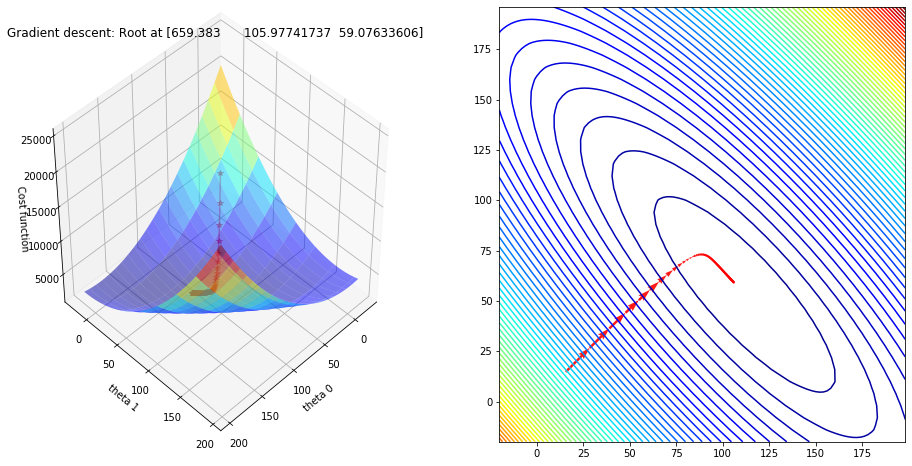

In [163]:
%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))
ax.view_init(45, 45)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()